Alunos: Ana Carolina da Silva e Gustavo Baroni Bruder

Importação das bibliotecas

- opencv: leitura do vídeo, captura de frames e salvamento de imagens
- yolo: carregar e aplicar o modelo de detecção de objetos

In [4]:
import cv2
from ultralytics import YOLO

Execução do vídeo com a detecção de objetos

In [5]:
video_path = "src/videos/39031.avi"

model = YOLO("yolov5s.pt")

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("erro")
    exit()

while True:
    success, frame = cap.read()
    if not success:
        break

    results = model(frame, verbose=False)[0]

    # Desenhar boxes e labels no frame
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        label = model.names[cls_id]
        conf = float(box.conf[0])

        if conf < 0.3:
            continue  

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"{label} {conf:.2f}"
        cv2.putText(frame, text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    cv2.imshow("Detecção - YOLOv5", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()

cv2.destroyAllWindows()

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



Algumas imagens retiradas do video de detecção

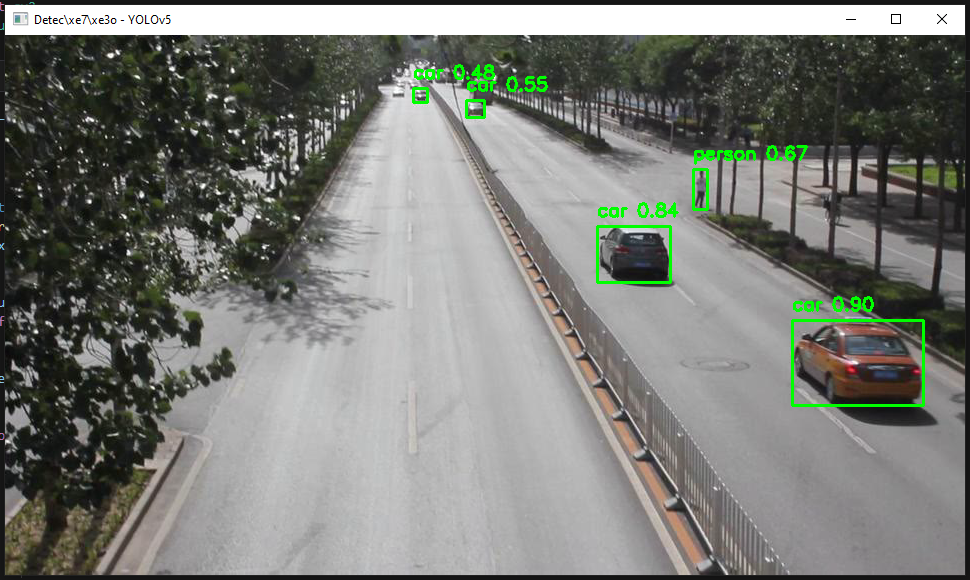
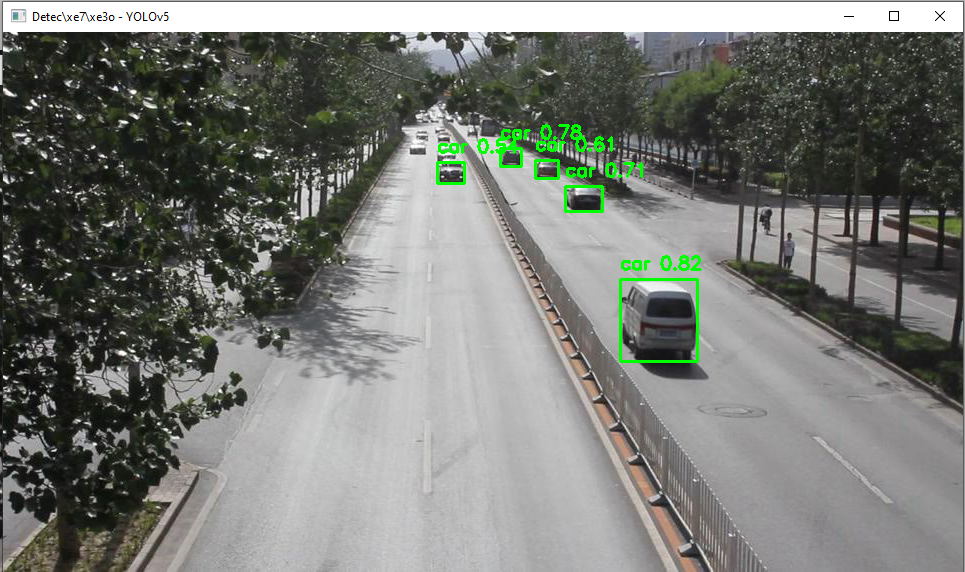
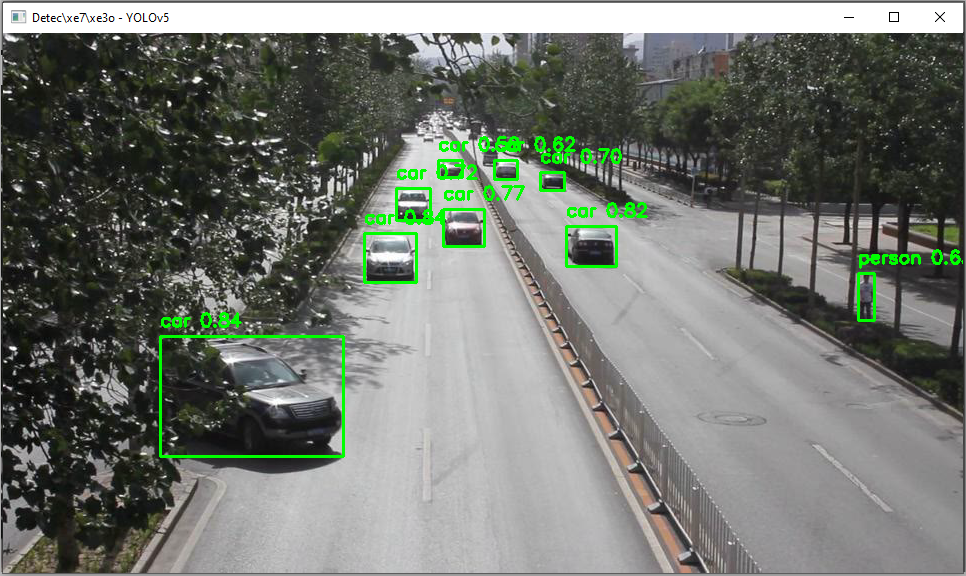
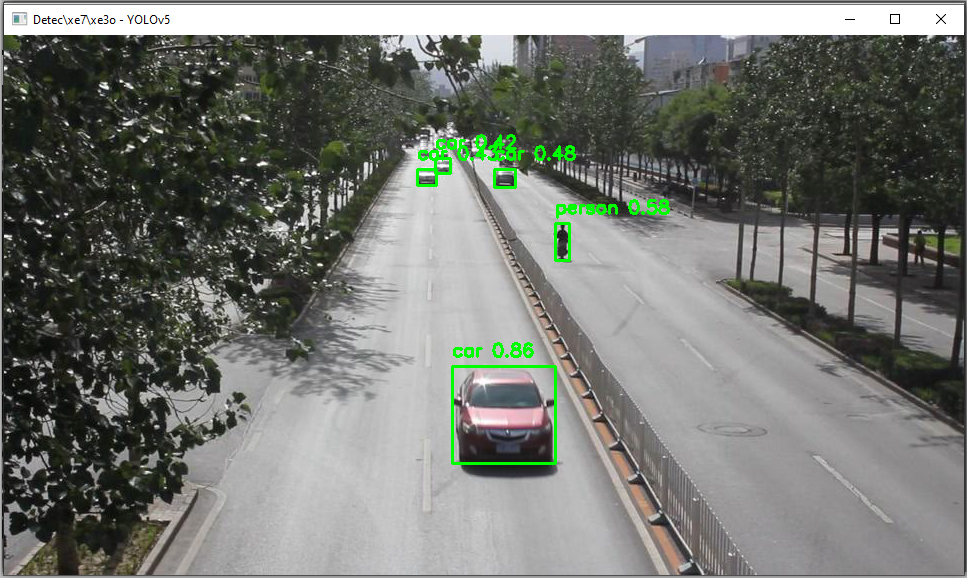
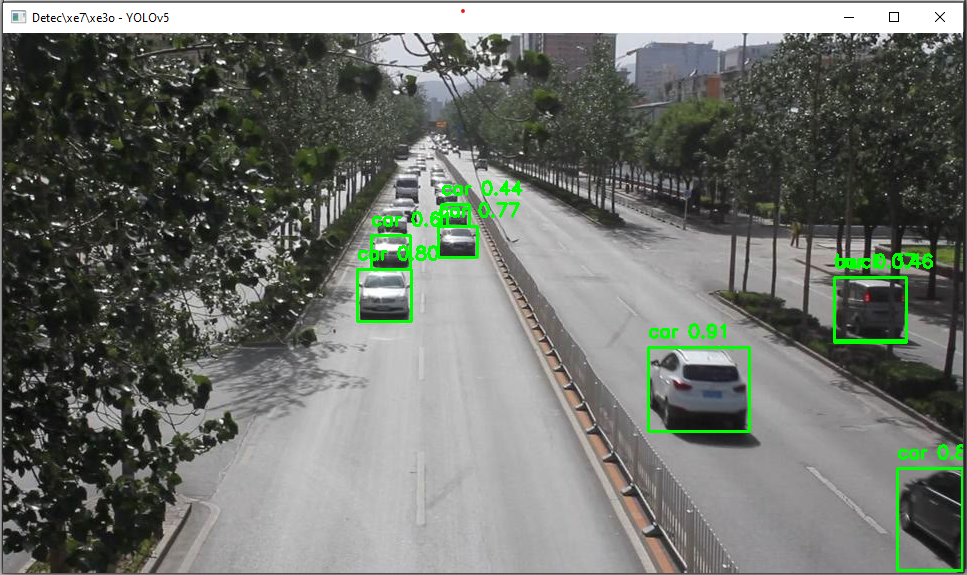
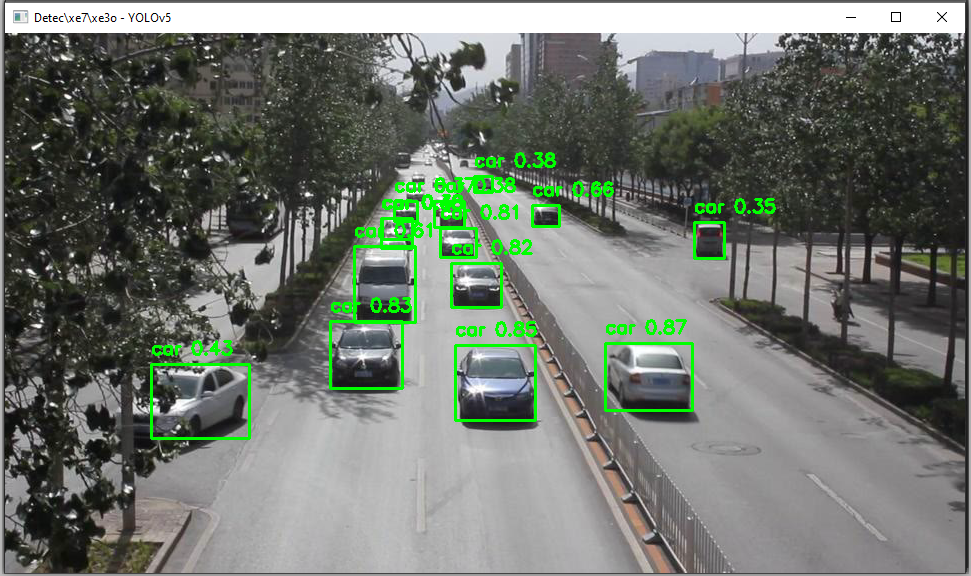